## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv',
                   sep=",")
pd.concat([data.head(5), data.tail(5)])

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [ ]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
quantitative = ['duration', 'amount', 'age']
binary = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
ordinal = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']
categorical = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'] 
print('Quantitative attributes:', quantitative)
print('Binary attributes:', binary)
print('Ordinal attributes:', ordinal)
print('Categorical attributes:', categorical)

Quantitative attributes: ['duration', 'amount', 'age']
Binary attributes: ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
Ordinal attributes: ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']
Categorical attributes: ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
print('Mean credit in each category:',data.groupby('purpose')['amount'].mean())

Mean credit in each category: purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
rent_data = len(data[(data['age'] < 30)&(data['housing']=='rent')])
len_data = len(data)
print('Percentage of people with rented housing below 30 years: ' + str((rent_data / len_data)* 100) + '%')

rent_data = len(data[(data['age'] > 40)&(data['housing']=='rent')])
len_data = len(data)
print('Percentage of people with rented housing above 40 years: ' + str(round((rent_data / len_data)* 100, 2)) + '%')

Percentage of people with rented housing below 30 years: 24.6%
Percentage of people with rented housing above 40 years: 18.5%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
condition_data = len(data[(data['number_credits'] == '4-5') & (data['foreign_worker'] == 'yes')]) + len(data[(data['number_credits'] == '>= 6') & (data['foreign_worker'] == 'yes')])
print('Number of workers with more than 3 credits:', condition_data)

Number of workers with more than 3 credits: 1


### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

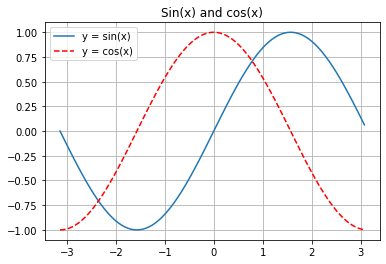

In [ ]:
a, b = -np.pi, np.pi
x = np.arange(a, b, (b - a) / 100) # start,stop,step
y = np.sin(x)
z = np.cos(x)
plt.title('Sin(x) and cos(x)')
plt.plot(x, y, label = 'y = sin(x)')
plt.plot(x, z, label = 'y = cos(x)', color='red', linestyle='dashed')
plt.grid()
plt.legend()
plt.show() 

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

(0.0, 350.0)

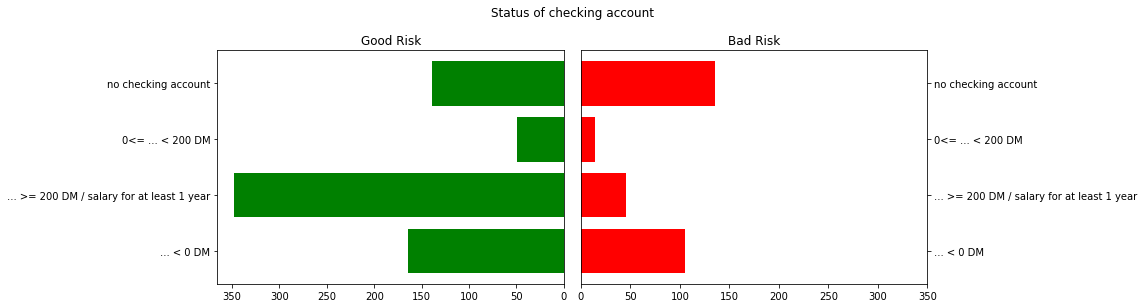

In [ ]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 4))
data_barh = data.groupby(['credit_risk', 'status']).agg(count =('credit_risk', 'count'))
data_barh = data_barh.reset_index()
data_good = data_barh[data_barh["credit_risk"] == 'good']['status']
data_good_count = data_barh[data_barh["credit_risk"] == 'good']['count']
data_bad = data_barh[data_barh["credit_risk"] == 'bad']['status']
data_bad_count = data_barh[data_barh["credit_risk"] == 'bad']['count']
fig.suptitle('Status of checking account', y = 1.06)
axs[0].barh(data_good, data_good_count, color='green')
axs[1].barh(data_bad, data_bad_count, color='red')
axs[0].set_title('Good Risk')
axs[1].set_title('Bad Risk')
axs[0].invert_xaxis()
axs[1].yaxis.tick_right() 
axs[1].set_xlim([0, 350])

В то время как наибольшее количество положительных кейсов наблюдается при наибольшем размере текущего счета, количество отрицательных кейсов чаще всего наблюдается при отрицательном счету или отсутствии информации о статусе счета клиента.

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

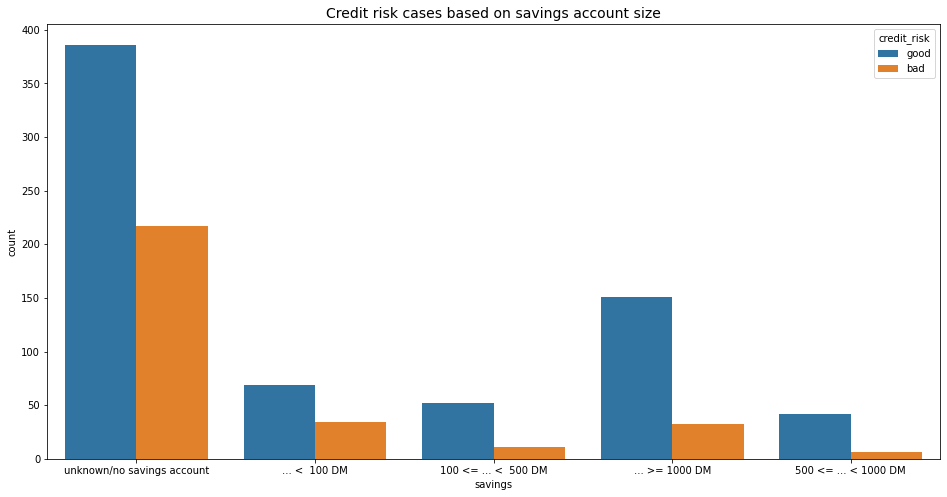

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Credit risk cases based on savings account size', fontsize = 14)
sns.countplot(x='savings', hue='credit_risk', data = data)


Наибольшее количество как положительных, так и отрицательных кейсов наблюдается при отсутствии сберегательного счета, либо когда нет информации о его наличии. Также, заметно больше положительных кейсов представлено при наибольшем сберегательном счету.

Как с точки зрения восприятия, так и с точки зрения трудоемкости кода seaborn справляется гораздо лучше matplotlib.


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

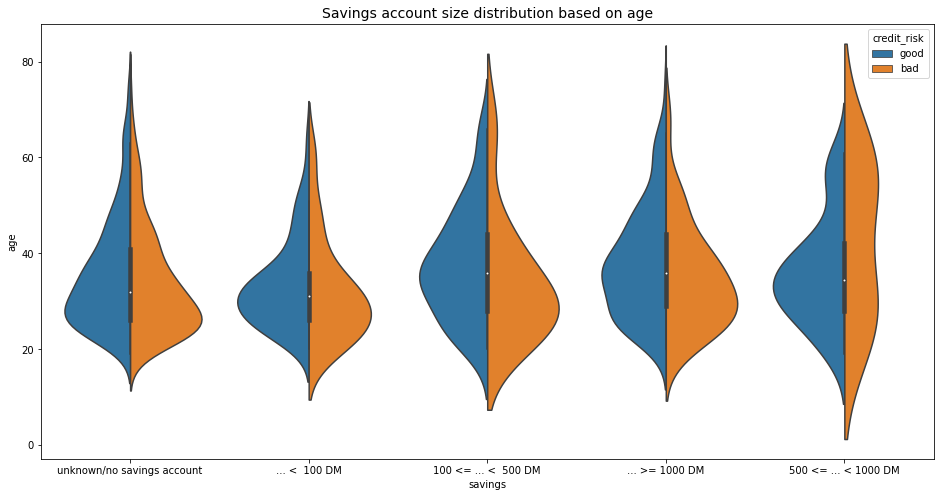

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Savings account size distribution based on age', fontsize=14)
sns.violinplot(x='savings', y='age', hue='credit_risk', split=True, data = data)

Практически во всех случаях наибольшее количество как отрицательных, так и положительных кейсов находится в диапазоне от 20 до 40 лет. Единственное исключение – размер сберегательного счета выше среднего, при котором распределение отрицательных кейсов идет равномерно.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

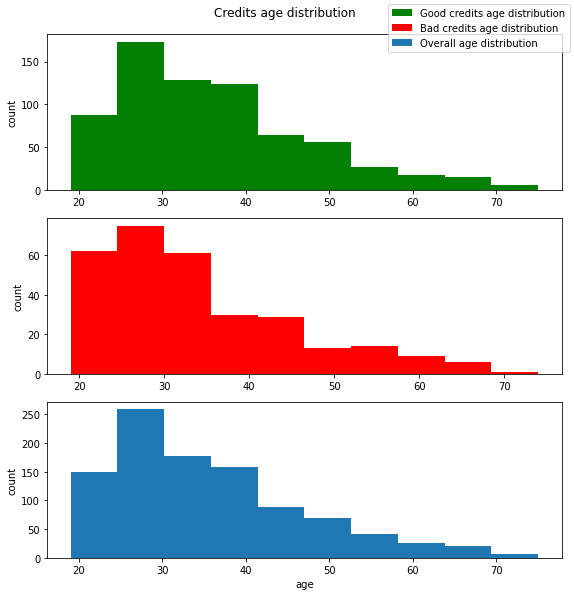

In [ ]:
data_good_age = data.loc[data["credit_risk"] == 'good']['age'].values.tolist()
data_bad_age = data.loc[data["credit_risk"] == 'bad']['age'].values.tolist()
data_age = data['age'].values.tolist()
fig, axs = plt.subplots(3, 1, tight_layout=True, figsize=(8, 8))
axs[0].hist(data_good_age, color='green', label='Good credits age distribution')
axs[1].hist(data_bad_age, color='red', label='Bad credits age distribution')
axs[2].hist(data_age, label='Overall age distribution')
axs[0].set_ylabel('count')
axs[1].set_ylabel('count')
axs[2].set_ylabel('count')
axs[2].set_xlabel('age')
fig.suptitle('Credits age distribution', y = 1.03)
fig.legend(loc='upper right')

В то время как наибольшее количество как положительных, так и отрицательных кейсов наблюдаются при возрасте от 25 до 30 лет, отрицательные кейсы гораздо более распространены среди молодых людей, в то время как при возрасте от 35 до 40 наблюдается рост положительных случаев.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

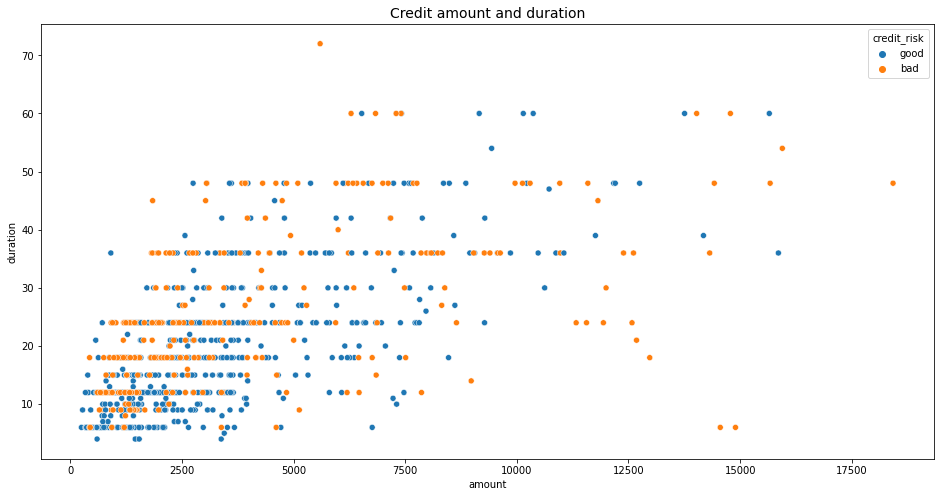

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Credit amount and duration', fontsize=14)
sns.scatterplot(x="amount", y="duration", hue='credit_risk', data=data)

При кредитах до 10000 количество обоих кейсов примерно одинаково, в то время как при больших кредитах появляется соответственно больше отрицательных случаев.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

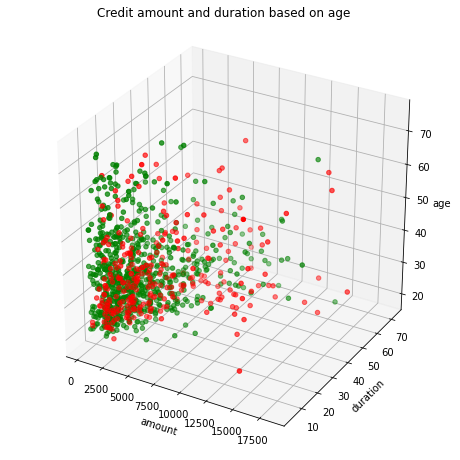

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

colors = {'bad':'red', 'good':'green'}

fig.suptitle('Credit amount and duration based on age', y=0.9)
ax.set_xlabel("amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")
ax.scatter(data['amount'],data['duration'], data['age'], c = data['credit_risk'].map(colors))


Наибольшее количество как положительных, так и отрицательных кейсов наблюдается при возрасте от 20 до 40 лет.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
data = data.merge(pd.get_dummies(data[categorical], drop_first=True, prefix=categorical), left_index=True, right_index=True)
['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'] 
data = data.drop(categorical, axis = 1)

In [ ]:
data[binary] = data[binary].apply(lambda x: pd.factorize(x)[0])
data[ordinal] = data[ordinal].apply(lambda x: pd.factorize(x)[0])
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_furniture/equipment,purpose_others,purpose_radio/television,purpose_repairs,purpose_retraining,purpose_vacation,personal_status_sex_female : single,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,18,1049,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,0,9,2799,0,1,1,1,36,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0
2,1,12,841,1,2,1,0,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
3,0,12,2122,0,1,2,1,39,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
4,0,12,2171,0,1,0,0,38,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,1,1,0,21,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
996,0,24,2303,0,4,0,3,45,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0
997,2,21,12680,3,4,0,0,30,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0
998,1,12,6468,3,3,1,3,52,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
    mean_data = (Xtest >= Xtest.mean(axis=0)).sum(axis=1)
    median = np.median(mean_data)
    return np.where(mean_data >= median, 0, 1) 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

0.612

Функция высчитывает среднее значение и медиану. Затем она возвращает 0, если среднее оказалось больше медианы или 1, если меньше.